In [16]:
!pip install statsmodels prophet

In [17]:
# check torch gpu
import torch

device = None

print("<!> Selecting GPU as main device <!>")
if torch.cuda.is_available():
    torch.cuda.set_device(0)
    device = torch.device("cuda")
    print("<!> Using: " + torch.cuda.get_device_name(0) + "<!>")
else:
    print("<!> No GPU available <!>")
    exit(0)

<!> Selecting GPU as main device <!>
<!> Using: NVIDIA GeForce GTX 1050<!>


In [18]:
import pandas as pd

print("<!> Loading test dataframe <!>")
df = pd.read_csv('/root/test/train_transactions.csv')

<!> Loading test dataframe <!>


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from math import sqrt

# Convert date column to datetime format
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])


# Split data into train and test sets
train_df = df[df['date'] < '2017-01-01']
test_df = df[df['date'] >= '2017-01-01']

# Select one item (Example: Item ID 1)
item_id = '2'

train_series = train_df[['date', item_id]].rename(columns={'date': 'ds', item_id: 'y'})
test_series = test_df[['date', item_id]].rename(columns={'date': 'ds', item_id: 'y'})



19:38:50 - cmdstanpy - INFO - Chain [1] start processing
19:38:50 - cmdstanpy - INFO - Chain [1] done processing
/tmp/ipykernel_1091394/2352081438.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future[f'rolling_avg_{window_size}'].ffill(inplace=True)  # Forward fill missing values



=== Evaluation for Rolling Window 7 Days ===
  - Mean Absolute Percentage Error (MAPE): 0.04
  - Symmetric MAPE (SMAPE): 4.45
  - Mean Squared Error (MSE): 1439.59
  - Root Mean Squared Error (RMSE): 37.94
  - R² Score: 0.94


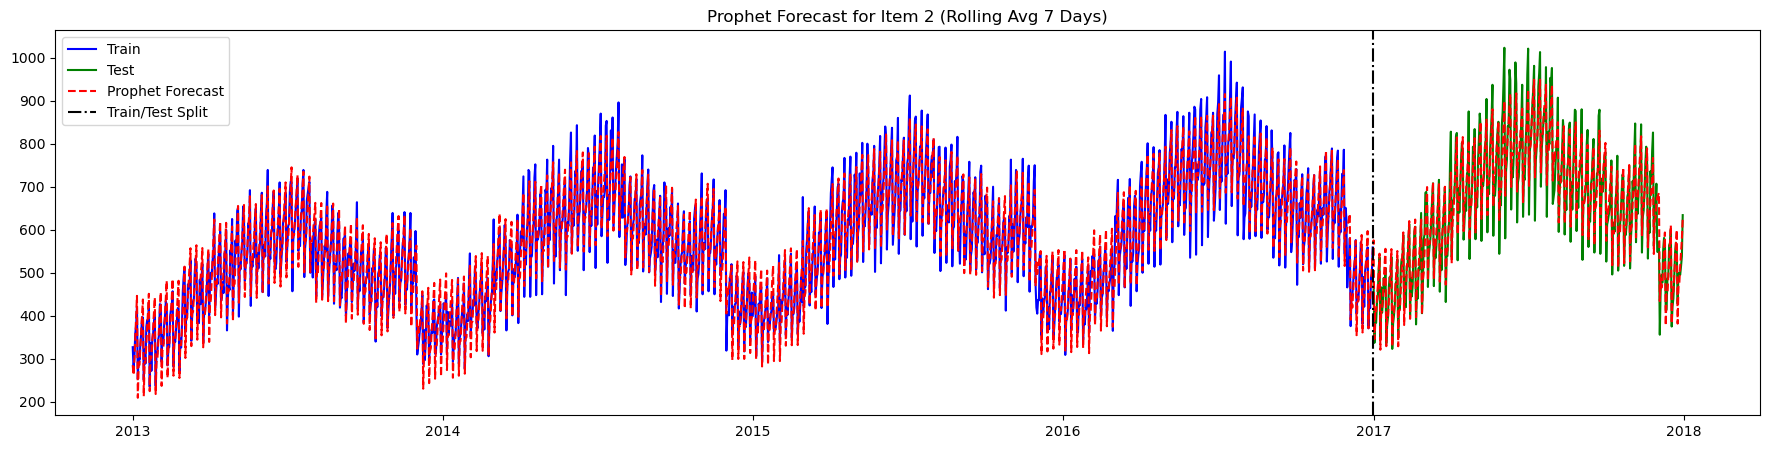

19:38:51 - cmdstanpy - INFO - Chain [1] start processing
19:38:51 - cmdstanpy - INFO - Chain [1] done processing


         ds  yhat_forecast  y_actual       error  error_percentage
0   2017-01   13818.770528     13481 -337.770528         -2.505530
1   2017-02   14153.870973     14056  -97.870973         -0.696293
2   2017-03   18419.018953     18289 -130.018953         -0.710913
3   2017-04   21005.955279     21146  140.044721          0.662275
4   2017-05   22984.561507     22826 -158.561507         -0.694653
5   2017-06   23983.984500     24173  189.015500          0.781928
6   2017-07   25950.864134     26193  242.135866          0.924430
7   2017-08   22958.124809     22771 -187.124809         -0.821768
8   2017-09   21210.277206     21294   83.722794          0.393176
9   2017-10   19954.578337     19713 -241.578337         -1.225477
10  2017-11   20477.677334     20776  298.322666          1.435900
11  2017-12   16124.113524     15703 -421.113524         -2.681739
Mean Error Percentage (7 Days): -0.43%
Model saved as prophet_model_2_rolling_avg_7.json


/tmp/ipykernel_1091394/2352081438.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future[f'rolling_avg_{window_size}'].ffill(inplace=True)  # Forward fill missing values



=== Evaluation for Rolling Window 14 Days ===
  - Mean Absolute Percentage Error (MAPE): 0.05
  - Symmetric MAPE (SMAPE): 5.14
  - Mean Squared Error (MSE): 1754.36
  - Root Mean Squared Error (RMSE): 41.89
  - R² Score: 0.92


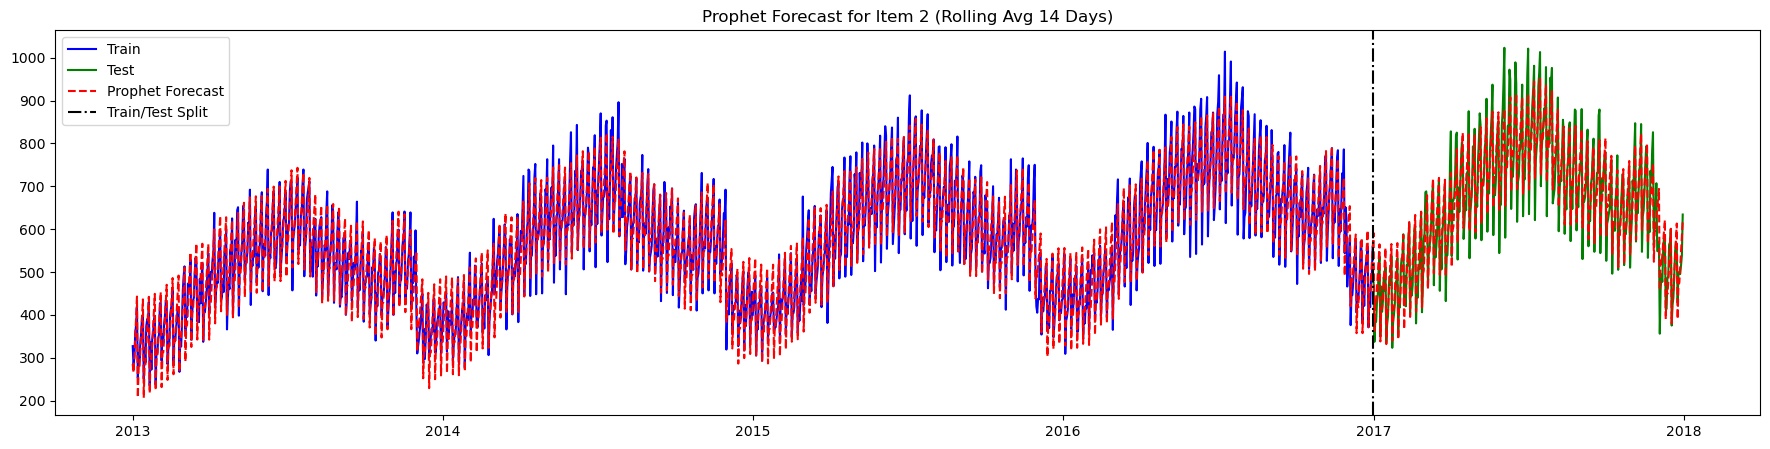

         ds  yhat_forecast  y_actual       error  error_percentage
0   2017-01   14197.589696     13481 -716.589696         -5.315553
1   2017-02   14266.076724     14056 -210.076724         -1.494570
2   2017-03   18578.727975     18289 -289.727975         -1.584165
3   2017-04   20949.181293     21146  196.818707          0.930761
4   2017-05   23026.412993     22826 -200.412993         -0.878003
5   2017-06   23936.813611     24173  236.186389          0.977067
6   2017-07   25810.956335     26193  382.043665          1.458572
7   2017-08   23052.984476     22771 -281.984476         -1.238349
8   2017-09   21170.139890     21294  123.860110          0.581667
9   2017-10   20216.428535     19713 -503.428535         -2.553790
10  2017-11   20430.969207     20776  345.030793          1.660718
11  2017-12   16403.515722     15703 -700.515722         -4.461031
Mean Error Percentage (14 Days): -0.99%


19:38:51 - cmdstanpy - INFO - Chain [1] start processing
19:38:51 - cmdstanpy - INFO - Chain [1] done processing


Model saved as prophet_model_2_rolling_avg_14.json


/tmp/ipykernel_1091394/2352081438.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future[f'rolling_avg_{window_size}'].ffill(inplace=True)  # Forward fill missing values



=== Evaluation for Rolling Window 30 Days ===
  - Mean Absolute Percentage Error (MAPE): 0.05
  - Symmetric MAPE (SMAPE): 5.03
  - Mean Squared Error (MSE): 1788.81
  - Root Mean Squared Error (RMSE): 42.29
  - R² Score: 0.92


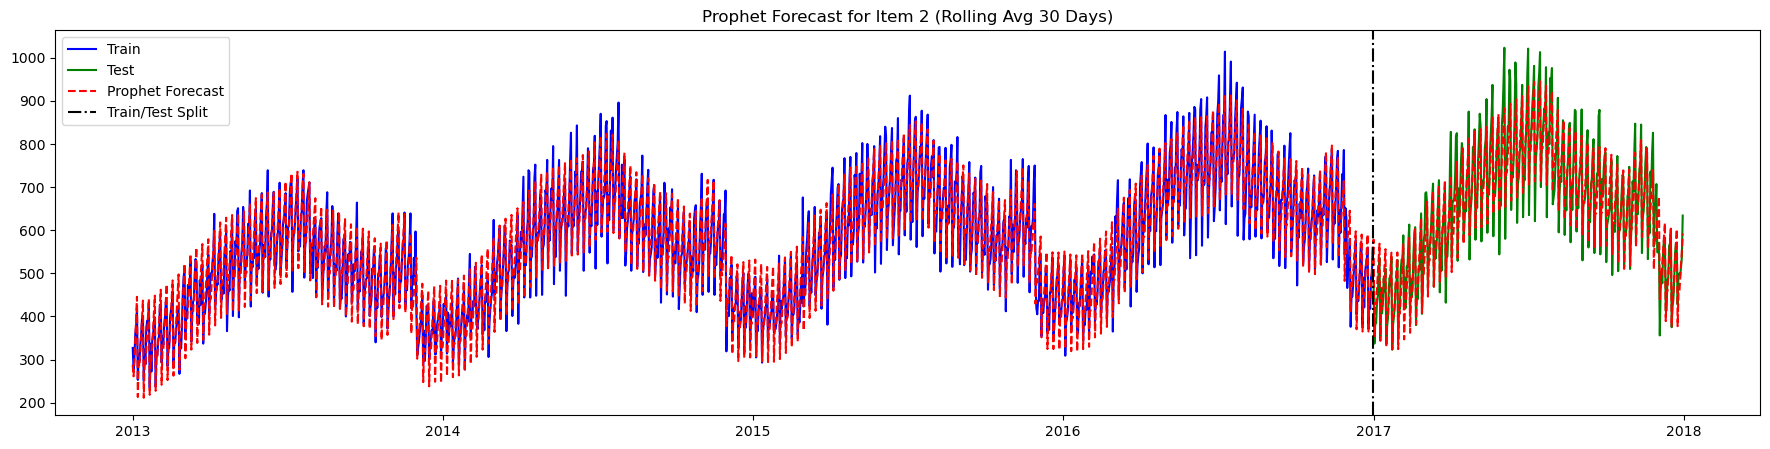

         ds  yhat_forecast  y_actual       error  error_percentage
0   2017-01   14002.643506     13481 -521.643506         -3.869472
1   2017-02   13629.311063     14056  426.688937          3.035636
2   2017-03   18201.808455     18289   87.191545          0.476743
3   2017-04   20429.627395     21146  716.372605          3.387745
4   2017-05   22777.542086     22826   48.457914          0.212293
5   2017-06   23733.543454     24173  439.456546          1.817964
6   2017-07   25718.508355     26193  474.491645          1.811521
7   2017-08   23036.295414     22771 -265.295414         -1.165058
8   2017-09   20835.589337     21294  458.410663          2.152769
9   2017-10   20087.956094     19713 -374.956094         -1.902075
10  2017-11   20020.596613     20776  755.403387          3.635942
11  2017-12   16106.145331     15703 -403.145331         -2.567314
Mean Error Percentage (30 Days): 0.59%
Model saved as prophet_model_2_rolling_avg_30.json


In [20]:

for window_size in [7, 14, 30]:
    df[f'rolling_avg_{window_size}'] = df[item_id].rolling(window=window_size, min_periods=1).mean()
    
    # Create new train/test sets
    train_series[f'rolling_avg_{window_size}'] = df[f'rolling_avg_{window_size}']
    test_series[f'rolling_avg_{window_size}'] = df[f'rolling_avg_{window_size}']
    
    # Initialize and fit Prophet model
    model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=True)
    model.add_regressor(f'rolling_avg_{window_size}')
    model.fit(train_series)
    
    # Create future dataframe
    future = model.make_future_dataframe(periods=len(test_series))
    future = future.merge(df[['date', f'rolling_avg_{window_size}']], left_on='ds', right_on='date', how='left').drop(columns=['date'])
    future[f'rolling_avg_{window_size}'].ffill(inplace=True)  # Forward fill missing values
    
    # Make predictions
    forecast = model.predict(future)

    # Evaluate the model
    def evaluate_forecast(y_true, y_pred):
        mape = mean_absolute_percentage_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = sqrt(mse)
        smape = 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))
        r2 = r2_score(y_true, y_pred)
        
        print(f"\n=== Evaluation for Rolling Window {window_size} Days ===")
        print(f"  - Mean Absolute Percentage Error (MAPE): {mape:.2f}")
        print(f"  - Symmetric MAPE (SMAPE): {smape:.2f}")
        print(f"  - Mean Squared Error (MSE): {mse:.2f}")
        print(f"  - Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"  - R² Score: {r2:.2f}")
    
    evaluate_forecast(test_series['y'], forecast['yhat'][-len(test_series):])
    
    # Plot results
    plt.figure(figsize=(22, 5))
    plt.plot(train_series['ds'], train_series['y'], label="Train", color="blue")
    plt.plot(test_series['ds'], test_series['y'], label="Test", color="green")
    plt.plot(forecast['ds'], forecast['yhat'], label="Prophet Forecast", color="red", linestyle="dashed")
    plt.axvline(train_series['ds'].iloc[-1], color="black", linestyle="-.", label="Train/Test Split")
    plt.legend()
    plt.title(f"Prophet Forecast for Item {item_id} (Rolling Avg {window_size} Days)")
    plt.show()
    
    # Calculate total forecasted sales and actual sales
    forecasted_sales = forecast.groupby(forecast['ds'].dt.to_period('M'))['yhat'].sum().reset_index()
    actual_sales = test_series.groupby(test_series['ds'].dt.to_period('M'))['y'].sum().reset_index()
    
    # Rename columns
    forecasted_sales.rename(columns={'yhat': 'yhat_forecast'}, inplace=True)
    actual_sales.rename(columns={'y': 'y_actual'}, inplace=True)
    
    # Compare forecasted sales to actual sales
    comparison = pd.merge(forecasted_sales, actual_sales, on='ds')
    comparison['error'] = comparison['y_actual'] - comparison['yhat_forecast']
    comparison['error_percentage'] = (comparison['error'] / comparison['y_actual']) * 100
    print(comparison)
    
    # Calculate mean error percentage
    mean_error_percentage = comparison['error_percentage'].mean()
    print(f"Mean Error Percentage ({window_size} Days): {mean_error_percentage:.2f}%")

    # save the model
    model_json = model_to_json(model)
    with open(f'/root/tmp/prophet_model_{item_id}_rolling_avg_{window_size}.json', 'w') as file:
        file.write(model_json)
    print(f"Model saved as prophet_model_{item_id}_rolling_avg_{window_size}.json")
